# Direct from Biot-Savart

$\newcommand{\bfL}{{\bf L}}$
$\newcommand{\bfA}{{\bf A}}$
$\newcommand{\bfB}{{\bf B}}$
$\newcommand{\bfx}{{\bf x}}$
$\newcommand{\bfna}{{\bf\nabla}}$

For a closed loop defined parametrically with a periodic finction $\bfL(t)$, the magnetic field (up to a constant factor) is
$$\bfB(\bfx)=\oint dt\frac{\dot\bfL(t)\times(\bfx-\bfL)}{|\bfx-\bfL|^3}.$$
Let $\bfL(t)=(a\cos(t), a\sin(t), 0)$ be a circle in the $(x,y)$ plane.  Then
$$
\begin{aligned}
\dot\bfL &= (-a\sin(t), a\cos(t), 0),\\
\bfx-\bfL &= (x-a\cos(t), y-b\sin(t), z),\\
\dot\bfL\times(\bfx-\bfL) &= (a\cos(t)z, a\sin(t)z, -a\sin(t)(y-a\sin(t))-a\cos(t)(x-a\cos(t))).
\end{aligned}
$$
The field is then
$$\bfB(a, \bfx) = a\oint dt\frac{(\cos(t)z, \sin(t)z, -\sin(t)(y-a\sin(t))-\cos(t)(x-a\cos(t)))}
{[(x-a\cos(t))^2 + (y-a\sin(t))^2 + z^2]^{3/2}}.$$

In [16]:
import scipy.integrate as integrate
import numpy as np

def dB(x, y, z, a, t):
    cos = np.cos(t)
    sin = np.sin(t)
    num = np.array([cos*z, sin*z, -sin*(y-a*sin) - cos*(x-a*cos)])
    den = (x-a*cos)**2 + (y-a*sin)**2 + z**2
    den *= np.sqrt(den)
    return num/den
    
def loop_B(x, y, z, a):
    return integrate.quad_vec(lambda t: dB(x, y, z, a, t), 0, 2*np.pi)

loop_B(1, 2, 3, 0.1) # returns tuple (result, error)
    

(array([0.00385284, 0.00770569, 0.00557187]), 1.2170402051000651e-14)

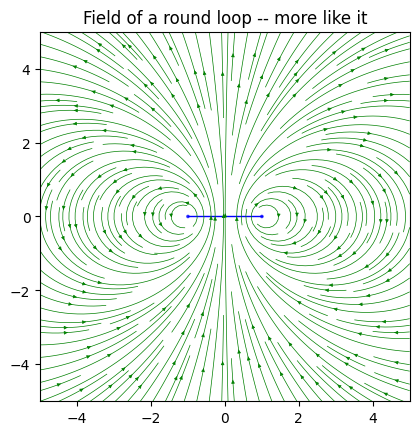

In [39]:
import matplotlib.pyplot as plt

def mark_loop(ax, x, a, color):
    ax.add_patch(Circle((x-a, 0), 0.03, color=color, alpha=0.7))
    ax.add_patch(Circle((x+a, 0), 0.03, color=color, alpha=0.7))
    shift = 0.01 if color == 'blue' else -0.01
    ax.add_artist(lines.Line2D([x-a, x+a], [shift,shift], linewidth=1, color=color))

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

xmin, xmax = -5, 5
zmin, zmax =  -5, 5
xx, zz = np.linspace(xmin, xmax, 151), np.linspace(zmin, zmax, 151)
xx_grid, zz_grid = np.meshgrid(xx, zz)

B = loop_B(xx_grid, 0, zz_grid, 1)[0]
if 1:
    mark_loop(ax, 0, 1, 'blue')
    ax.streamplot(xx_grid, zz_grid, B[0], B[2], density=2, color='g',
                    linewidth=0.5, cmap=plt.cm.viridis, arrowsize=0.5)
    ax.set_aspect('equal')
    ax.set_title('Field of a round loop -- more like it')
    plt.show()

## Field of two non-concetric loops

The field created by two loops with radii $a$ and $a_2$, currents $I=1$ and $I_2$, centered at $(0,0,0)$ and $(\xi_2,0,0)$:
$$
\bfB(a,x,y,z) + I_2\bfB(a_2,x-\xi_2,y,z)
$$

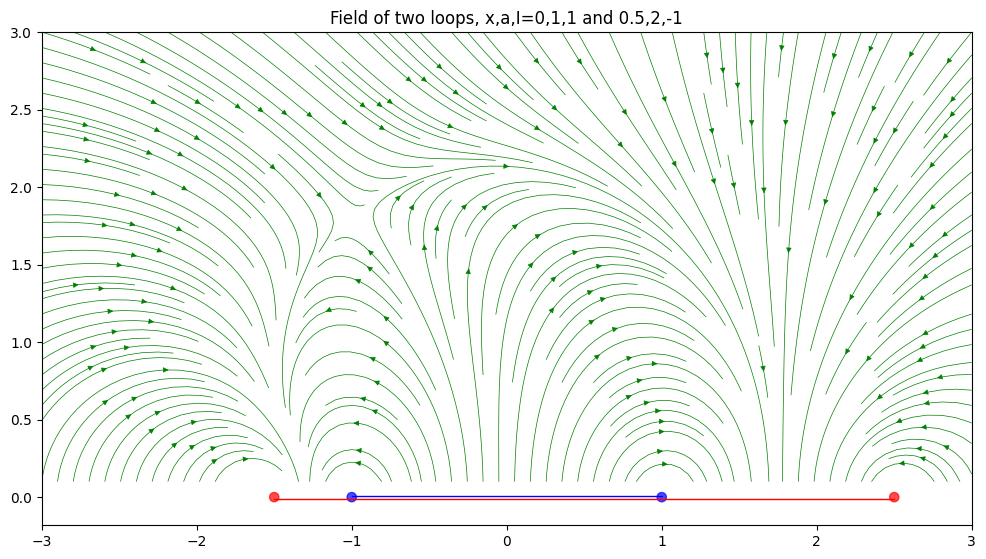

In [40]:
from matplotlib.patches import Circle
import matplotlib.lines as lines

xmin, xmax = -3, 3
zmin, zmax =  0.1, 3
xx, zz = np.linspace(xmin, xmax, 150), np.linspace(zmin, zmax, 150)
xx_grid, zz_grid = np.meshgrid(xx, zz)

a1, a2 = 1, 2 # radii of loops
I1, I2 = 1, -1  # currents, clockwise if negative
x1, x2 = 0, 0.5   # loop x-centers
B = I1*loop_B(xx_grid - x1, 0, zz_grid, a1)[0] + \
    I2*loop_B(xx_grid - x2, 0, zz_grid, a2)[0]
# print(B)
if 1: 
    fig = plt.figure(figsize=(12,8))
    ax  = fig.add_subplot(1, 1, 1)
    mark_loop(ax, x1, a1, 'blue')
    mark_loop(ax, x2, a2, 'red')
    ax.streamplot(xx_grid, zz_grid, B[0], B[2], density=2, color='g',
                    linewidth=0.5, cmap=plt.cm.viridis, arrowsize=0.8)
    ax.set_aspect('equal')
    ax.set_title(f'Field of two loops, x,a,I={x1},{a1},{I1} and {x2},{a2},{I2}')
    plt.show()

## Vector potential

Biot-Savart for the field $\bfB=\bfna\times\bfA$ can be written in terms of $\bfA$ whose expression in terms of the current is similar to that of electrostatic potential of charges.  Piecewise, the direction of the vector potential is the same as that of the current:
$$\bfA(\bfx)=\oint dt\frac{\dot\bfL(t)}{|\bfx-\bfL|}.$$
If the currents are localized in the $(x,y)$ plane and the configuration is symmetric about the $x$ axis (or the plane $y=0$), the vector $\bfA$ at $y=0$ is directed along the $y$ axis.  At any point, $A_z\equiv0$, because the currents have no $z$ component.

Due to the mirror symmetry, the magnetic field at $y=0$ lies in that plane.  So we restrict the analysis to 2D field lines shown in the chart above.

We have
$$
B_x = \partial_yA_z - \partial_zA_y,\quad
B_z = \partial_xA_y - \partial_yA_x.
$$
As $A_x$ is an even function of $y$, its derivative at zero vanishes, and the field in the target plane is defined by the "stream function" $A=A_y(x,z)$
$$ (B_x, B_z) = (-\partial_z A, \partial_x A) = (\nabla A)\times{\bf e}_y.$$
The field lines in the plane are the lines of constant $A(x,z)$.


In [41]:
import scipy.integrate as integrate
import numpy as np

def dA(x, y, z, a, t):
    cos = np.cos(t)
    sin = np.sin(t)
    num = np.array([cos, -sin, 0])
    den = np.sqrt((x-a*cos)**2 + (y-a*sin)**2 + z**2)
    #print(f'num: {num}', flush=True)
    #print(f'den: {den}', flush=True)
    return np.outer(num, 1.0/den)
    
def loop_A(x, y, z, a):
    return integrate.quad_vec(lambda t: dA(x, y, z, a, t), 0, 2*np.pi)

loop_A(1, 2, 3, 0.1) # returns tuple (result, error)
    

(array([[ 0.00599377],
        [-0.01198754],
        [ 0.        ]]),
 5.025145250775618e-14)

(3, 150, 150)


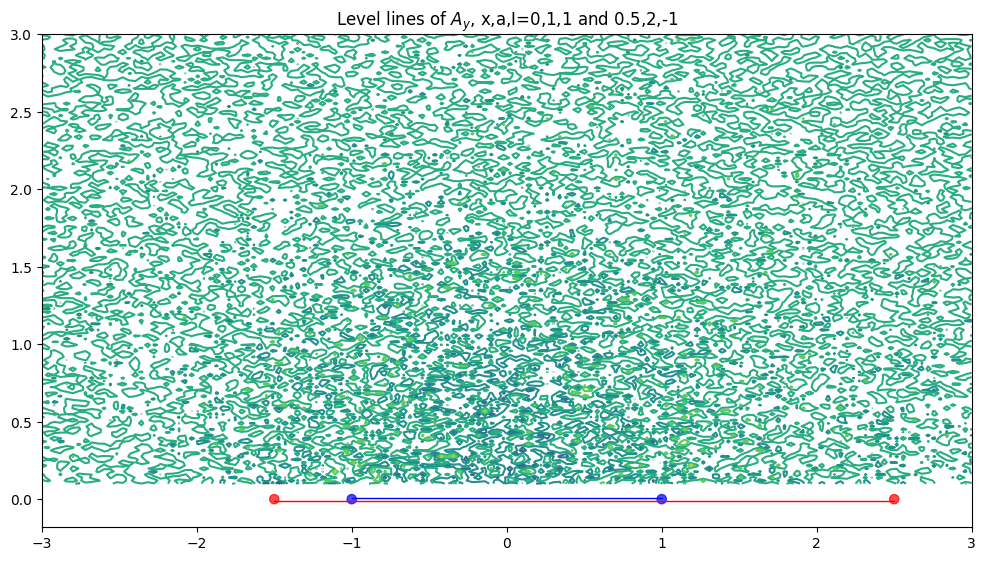

In [42]:
from matplotlib.patches import Circle
import matplotlib.lines as lines

A = I1*loop_A(xx_grid - x1, 0, zz_grid, a1)[0] + \
    I2*loop_A(xx_grid - x2, 0, zz_grid, a2)[0]
A = A.reshape(3, len(xx), len(zz))
print(A.shape, flush=True)
if 1: 
    fig = plt.figure(figsize=(12,8))
    ax  = fig.add_subplot(1, 1, 1)
    mark_loop(ax, x1, a1, 'blue')
    mark_loop(ax, x2, a2, 'red')
    ax.contour(xx_grid, zz_grid, A[1], cmap=plt.cm.viridis)
    ax.set_aspect('equal')
    ax.set_title(f'Level lines of $A_y$, x,a,I={x1},{a1},{I1} and {x2},{a2},{I2}')
    plt.show() # fucked up

## Parameter optimization

The two non-concentric loops, one inside the other, can create an X-point of zero field.  The same can be done (and easier computed) by three or four straight parallel condictors, but a loop allows for multiple windings to make a stronger field and its gradient.  Given the ease of Biot-Savart integration, more general configurations involving multiple circular or eliiptical loops can be used.  It appears though that circular loops provide enough degrees of freedom, though.  One can play with two loops and their 5 parameters ($x_1$ is just a translation of the whole configuration and can be set to 0) to optimize the X-point above to desired geometry.